In [4]:
#!pip install syntheval

In [5]:
import pandas as pd
import numpy as np

In [6]:
# Go to the /users/pgrad/mamu/Documents/first/ directory 
import os
#os.chdir('/users/pgrad/mamu/Documents/first')
os.chdir('D:/maxim/Dissertation/first')

In [7]:
# Load datasets
original_data = pd.read_csv('./datasets/data-ori.csv')
generated_data = pd.read_csv('./ctgan/results/synthetic_data_ctgan_data_ori.csv')

# Subset the datasets to the minimum length
min_len = min(len(original_data), len(generated_data))
original_data = original_data.iloc[:min_len]
generated_data = generated_data.iloc[:min_len]


In [8]:
original_data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4405,28.3,9.2,3.03,8.4,100,30.4,32.5,93.4,92,F,in
4406,33.7,10.4,3.48,11.4,112,29.9,30.9,96.8,92,F,in
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in


In [9]:
# print column names
print(original_data.columns)

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')


In [10]:

print(original_data.shape)
print(generated_data.shape)

(4410, 11)
(4410, 11)


In [11]:
# Separate the original into 80 20

original_data_train = original_data.iloc[:int(0.8 * len(original_data))]
original_data_test = original_data.iloc[int(0.8 * len(original_data)):]

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: dwm:   0%|          | 0/17 [00:00<?, ?it/s]

Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:33<00:33,  4.79s/it]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl:  88%|████████▊ | 15/17 [00:50<00:08,  4.22s/it]

Error: Membership inference attack metric did not run, holdout data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [01:08<00:00,  4.02s/it]



SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0232  0.0010   |
| PCA difference in eigenvalues (exp. var.):   0.3825           |
| PCA angle between eigenvectors (radians) :   1.5186           |
| Average confidence interval overlap      :   0.0654  0.0437   |
|   -> # non-overlapping COIs at 95%       :    7               |
|   -> fraction of non-overlapping CIs     :   0.7778           |
| Mixed correlation matrix difference      :   3.2077           |
| Pairwise mutual information difference   :   0.2485           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.1110  0.0201   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.0946  0.0196   |
|       -> avg. Total Variation Distance   :   0.1848  0.0404   |
|   -> average combined p-val

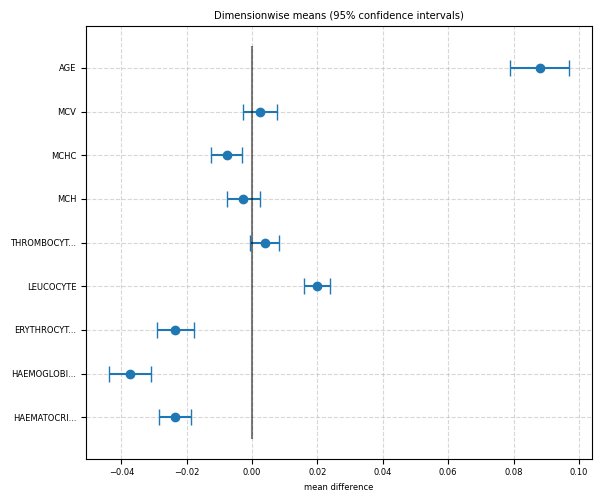

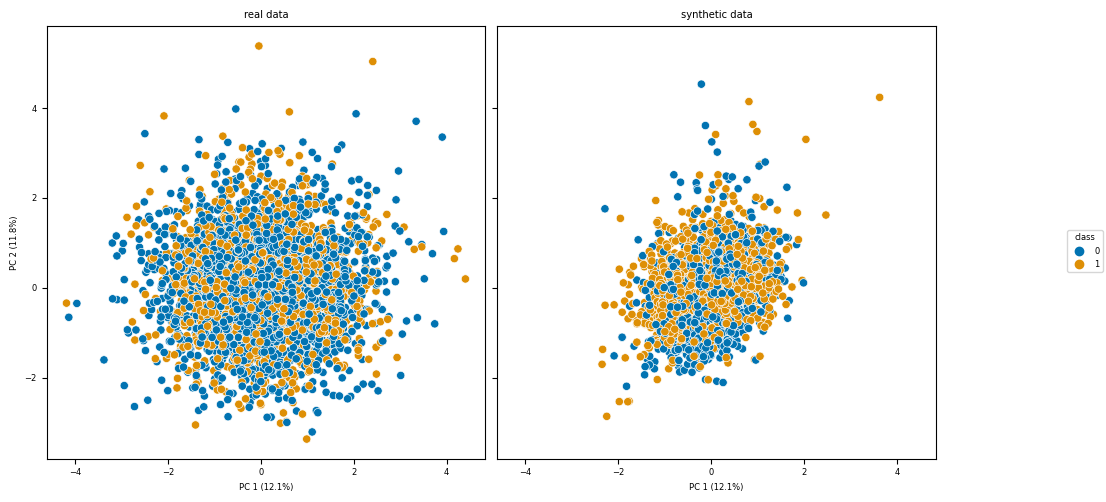

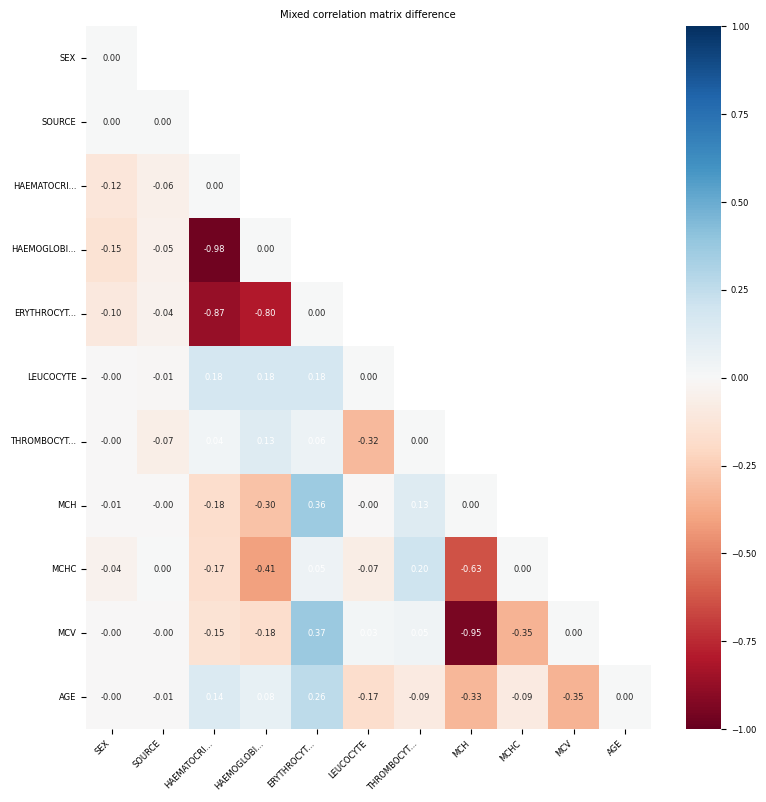

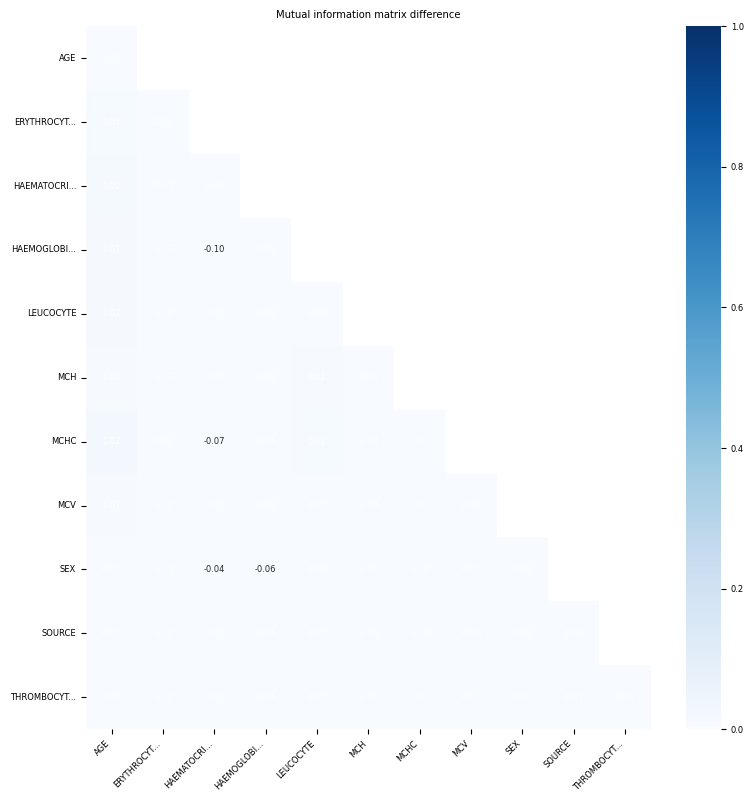

In [13]:
from syntheval import SynthEval

evaluator = SynthEval(generated_data)
_ = evaluator.evaluate(original_data_train, 'SOURCE', "full_eval")